# INFS3208 Individual Project 
# yulin wu 45659016
# Big data analysis of aviation services based on Skytrax user review dataset


In [73]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, FloatType, IntegerType
from pyspark.sql.functions import col, when

In [74]:
schema_lounge = StructType([
    StructField("airline_name", StringType(), True),
    StructField("link", StringType(), True),
    StructField("title", StringType(), True),
    StructField("author", StringType(), True),
    StructField("author_country", StringType(), True),
    StructField("date", StringType(), True),
    StructField("content", StringType(), True),
    StructField("lounge_name", StringType(), True),
    StructField("airport", StringType(), True),
    StructField("lounge_type", StringType(), True),
    StructField("date_visit", StringType(), True),
    StructField("type_traveller", StringType(), True),
    StructField("overall_rating", FloatType(), True),
    StructField("comfort_rating", IntegerType(), True),
    StructField("cleanliness_rating", IntegerType(), True),
    StructField("bar_beverages_rating", FloatType(), True),
    StructField("catering_rating", FloatType(), True),
    StructField("washrooms_rating", FloatType(), True),
    StructField("wifi_connectivity_rating", FloatType(), True),
    StructField("staff_service_rating", FloatType(), True),
    StructField("recommended", IntegerType(), True)
])

schema_airline = StructType([
    StructField("airline_name", StringType(), True),
    StructField("link", StringType(), True),
    StructField("title", StringType(), True),
    StructField("author", StringType(), True),
    StructField("author_country", StringType(), True),
    StructField("date", StringType(), True),
    StructField("content", StringType(), True),
    StructField("aircraft", StringType(), True),
    StructField("type_traveller", StringType(), True),
    StructField("cabin_flown", StringType(), True),
    StructField("route", StringType(), True),
    StructField("overall_rating", FloatType(), True),
    StructField("seat_comfort_rating", FloatType(), True),
    StructField("cabin_staff_rating", FloatType(), True),
    StructField("food_beverages_rating", FloatType(), True),
    StructField("inflight_entertainment_rating", FloatType(), True),
    StructField("ground_service_rating", FloatType(), True),
    StructField("wifi_connectivity_rating", FloatType(), True),
    StructField("value_money_rating", FloatType(), True),
    StructField("recommended", IntegerType(), True)
])



schema_airport = StructType([
    StructField("airport_name", StringType(), True),
    StructField("link", StringType(), True),
    StructField("title", StringType(), True),
    StructField("author", StringType(), True),
    StructField("author_country", StringType(), True),
    StructField("date", StringType(), True),
    StructField("content", StringType(), True),
    StructField("experience_airport", StringType(), True),
    StructField("date_visit", StringType(), True),
    StructField("type_traveller", StringType(), True),
    StructField("overall_rating", FloatType(), True),
    StructField("queuing_rating", FloatType(), True),
    StructField("terminal_cleanliness_rating", FloatType(), True),
    StructField("terminal_seating_rating", FloatType(), True),
    StructField("terminal_signs_rating", FloatType(), True),
    StructField("food_beverages_rating", FloatType(), True),
    StructField("airport_shopping_rating", FloatType(), True),
    StructField("wifi_connectivity_rating", FloatType(), True),
    StructField("airport_staff_rating", FloatType(), True),
    StructField("recommended", IntegerType(), True)
])


schema_seat = StructType([
    StructField("airline_name", StringType(), True),
    StructField("link", StringType(), True),
    StructField("title", StringType(), True),
    StructField("author", StringType(), True),
    StructField("author_country", StringType(), True),
    StructField("date", StringType(), True),
    StructField("content", StringType(), True),
    StructField("aircraft", StringType(), True),
    StructField("seat_layout", StringType(), True),
    StructField("date_flown", StringType(), True),
    StructField("cabin_flown", StringType(), True),
    StructField("type_traveller", StringType(), True),
    StructField("overall_rating", FloatType(), True),
    StructField("seat_legroom_rating", FloatType(), True),
    StructField("seat_recline_rating", FloatType(), True),
    StructField("seat_width_rating", FloatType(), True),
    StructField("aisle_space_rating", FloatType(), True),
    StructField("viewing_tv_rating", FloatType(), True),
    StructField("power_supply_rating", FloatType(), True),
    StructField("seat_storage_rating", FloatType(), True),
    StructField("recommended", IntegerType(), True)
])



In [75]:
spark = SparkSession.builder\
.appName("Airline_Recommendation")\
.getOrCreate()

In [76]:
seat_df = spark.read.csv("hdfs://namenode:9000/raw/seat.csv", header=True, schema=schema_seat)
airline_df = spark.read.csv("hdfs://namenode:9000/raw/airline.csv", header=True, schema=schema_airline)
lounge_df = spark.read.csv("hdfs://namenode:9000/raw/lounge.csv", header=True, schema=schema_lounge)
airport_df = spark.read.csv("hdfs://namenode:9000/raw/airport.csv", header=True, schema=schema_airport)

seat_df = seat_df.withColumn("recommended", when(col("recommended").isin("0", "1"), col("recommended")).otherwise(None))

# pre read

In [77]:
seat_df.printSchema()
airline_df.printSchema()
lounge_df.printSchema()
airport_df.printSchema()

root
 |-- airline_name: string (nullable = true)
 |-- link: string (nullable = true)
 |-- title: string (nullable = true)
 |-- author: string (nullable = true)
 |-- author_country: string (nullable = true)
 |-- date: string (nullable = true)
 |-- content: string (nullable = true)
 |-- aircraft: string (nullable = true)
 |-- seat_layout: string (nullable = true)
 |-- date_flown: string (nullable = true)
 |-- cabin_flown: string (nullable = true)
 |-- type_traveller: string (nullable = true)
 |-- overall_rating: float (nullable = true)
 |-- seat_legroom_rating: float (nullable = true)
 |-- seat_recline_rating: float (nullable = true)
 |-- seat_width_rating: float (nullable = true)
 |-- aisle_space_rating: float (nullable = true)
 |-- viewing_tv_rating: float (nullable = true)
 |-- power_supply_rating: float (nullable = true)
 |-- seat_storage_rating: float (nullable = true)
 |-- recommended: integer (nullable = true)

root
 |-- airline_name: string (nullable = true)
 |-- link: string (nu

In [78]:

seat_df.describe().show()
airline_df.describe().show()
lounge_df.describe().show()
airport_df.describe().show()

+-------+----------------+--------------------+--------------------+--------------------+--------------+----------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------+------------------+-------------------+-------------------+------------------+------------------+------------------+-------------------+-------------------+------------------+
|summary|    airline_name|                link|               title|              author|author_country|      date|             content|            aircraft|         seat_layout|          date_flown|         cabin_flown|type_traveller|    overall_rating|seat_legroom_rating|seat_recline_rating| seat_width_rating|aisle_space_rating| viewing_tv_rating|power_supply_rating|seat_storage_rating|       recommended|
+-------+----------------+--------------------+--------------------+--------------------+--------------+----------+--------------------+--------------------+--------------------+

In [79]:
lounge_df.select("recommended").distinct().show()
airline_df.select("recommended").distinct().show()
seat_df.select("recommended").distinct().show()
airport_df.select("recommended").distinct().show()

+-----------+
|recommended|
+-----------+
|       null|
|          1|
|          0|
+-----------+

+-----------+
|recommended|
+-----------+
|       null|
|          1|
|          0|
+-----------+

+-----------+
|recommended|
+-----------+
|       null|
|          1|
|          0|
+-----------+

+-----------+
|recommended|
+-----------+
|       null|
|          1|
|          0|
+-----------+



In [80]:
from pyspark.sql.functions import col, isnan, isnull, count, when, round

"""
/*
The code snippet (PySpark Missing Data Imputation – How to handle missing values in PySpark) below has been adapted from
https://www.machinelearningplus.com/pyspark/pyspark-missing-data-imputation/
I have changed adjusted the loop functionality
*/


"""
def calculate_missing_percentage(df, table_name):
    # Count the total number of rows in the DataFrame to use for calculating percentages
    total_rows = df.count()

    # Aggregate the DataFrame to count missing (null or NaN) entries per column
    missing_count_df = df.agg(*[count(when(isnull(c) | isnan(c), c)).alias(c) for c in df.columns])

    # Collect the missing counts into a dictionary
    missing_count = missing_count_df.collect()[0].asDict()

    # Calculate the percentage of missing data for each column and filter out columns with no missing data
    missing_percentage = {column: (value / total_rows) * 100 for column, value in missing_count.items() if value > 0}

    # Check if the missing_percentage dictionary is empty, which means there is no missing data
    if not missing_percentage:
        print(f"Table: {table_name}")
        # Return a DataFrame with a message about no missing data
        print("No missing data.")
        missing_percent = spark.createDataFrame([("No missing data", 0)], ["Variables", "Percent_Missing"])
    else:
        print(f"Table: {table_name}")
        # Create a DataFrame from the missing percentage dictionary
        missing_percentage_df = spark.createDataFrame([(k, v) for k, v in missing_percentage.items()], ["Variables", "Percent_Missing"])

        # Round the percentage values to two decimal places and sort by descending order
        missing_percent = missing_percentage_df.withColumn("Percent_Missing", round(missing_percentage_df["Percent_Missing"], 2))
        missing_percent = missing_percent.sort("Percent_Missing", ascending=False)

    missing_percent.show()

    
calculate_missing_percentage(lounge_df, "Lounge Data")
calculate_missing_percentage(airline_df, "Airline Data")
calculate_missing_percentage(airport_df, "Airport Data")
calculate_missing_percentage(seat_df, "Seat Data")


Table: Lounge Data
+--------------------+---------------+
|           Variables|Percent_Missing|
+--------------------+---------------+
|          date_visit|           95.3|
|      type_traveller|          94.77|
|      author_country|          21.36|
|         lounge_type|          13.67|
|             airport|           4.62|
|    washrooms_rating|           1.93|
|wifi_connectivity...|           1.32|
|staff_service_rating|           1.23|
|bar_beverages_rating|           1.01|
|         recommended|           0.97|
|     catering_rating|           0.92|
|  cleanliness_rating|           0.84|
|      comfort_rating|           0.79|
|      overall_rating|           0.79|
|         lounge_name|           0.57|
|              author|           0.26|
|                date|           0.13|
|             content|           0.09|
|                link|           0.04|
|               title|           0.04|
+--------------------+---------------+

Table: Airline Data
+--------------------+--

# data clean

In [81]:
# Remove columns with many missing values and unnecessary columns 
lounge_df_cleaned = lounge_df.drop("link", "title", "author", "author_country", "date", "content", "date_visit", "type_traveller", "lounge_type", "airport", "lounge_name")

airline_df_cleaned = airline_df.drop("link", "title", "author", "author_country", "date", "content", "wifi_connectivity_rating", "aircraft", "ground_service_rating", "route", "type_traveller", "cabin_flown")

airport_df_cleaned = airport_df.drop("link", "title", "author", "author_country", "date", "content", "airport_staff_rating", "terminal_signs_rating", "wifi_connectivity_rating", "terminal_seating_rating", "food_beverages_rating", "date_visit", "experience_airport", "type_traveller")

seat_df_cleaned = seat_df.drop("link", "title", "author", "author_country", "content", "date_flown", "type_traveller", "power_supply_rating", "seat_storage_rating", "aircraft", "seat_layout")
# Drop rows with null values in the 'recommended' column
airline_df_cleaned = airline_df_cleaned.dropna(subset=["recommended"])

airport_df_cleaned = airport_df_cleaned.dropna(subset=["recommended"])

seat_df_cleaned = seat_df_cleaned.dropna(subset=["recommended"])

lounge_df_cleaned = lounge_df_cleaned.dropna(subset=["recommended"])

In [82]:
calculate_missing_percentage(lounge_df_cleaned, "Lounge Data")
calculate_missing_percentage(airline_df_cleaned, "Airline Data")
calculate_missing_percentage(airport_df_cleaned, "Airport Data")
calculate_missing_percentage(seat_df_cleaned, "Seat Data")

Table: Lounge Data
+--------------------+---------------+
|           Variables|Percent_Missing|
+--------------------+---------------+
|    washrooms_rating|           1.11|
|wifi_connectivity...|           0.49|
|staff_service_rating|           0.36|
|bar_beverages_rating|           0.22|
|      overall_rating|           0.22|
|     catering_rating|           0.13|
+--------------------+---------------+

Table: Airline Data
+--------------------+---------------+
|           Variables|Percent_Missing|
+--------------------+---------------+
|inflight_entertai...|          24.75|
|food_beverages_ra...|          19.61|
| seat_comfort_rating|          18.69|
|  cabin_staff_rating|          18.68|
|      overall_rating|          11.02|
|  value_money_rating|           4.06|
+--------------------+---------------+

Table: Airport Data
+--------------------+---------------+
|           Variables|Percent_Missing|
+--------------------+---------------+
|airport_shopping_...|           28.5|
|  

In [83]:
# Drop rows with null values in the 'recommended' column
airline_df_cleaned = airline_df_cleaned.dropna(subset=["recommended"])

airport_df_cleaned = airport_df_cleaned.dropna(subset=["recommended"])

seat_df_cleaned = seat_df_cleaned.dropna(subset=["recommended"])

lounge_df_cleaned = lounge_df_cleaned.dropna(subset=["recommended"])

# RandomForestClassifier processing

In [84]:
# Remove columns with many missing values and unnecessary columns 
lounge_df_cleaned = lounge_df.drop("link", "title", "author", "author_country", "date", "content", "date_visit", "type_traveller", "lounge_type", "airport", "lounge_name")

airline_df_cleaned = airline_df.drop("link", "title", "author", "author_country", "date", "content", "wifi_connectivity_rating", "aircraft", "ground_service_rating", "route", "type_traveller", "cabin_flown")

airport_df_cleaned = airport_df.drop("link", "title", "author", "author_country", "date", "content", "airport_staff_rating", "terminal_signs_rating", "wifi_connectivity_rating", "terminal_seating_rating", "food_beverages_rating", "date_visit", "experience_airport", "type_traveller")

seat_df_cleaned = seat_df.drop("link", "title", "author", "author_country", "content", "date_flown", "type_traveller", "power_supply_rating", "seat_storage_rating", "aircraft", "seat_layout")
# Drop rows with null values in the 'recommended' column
airline_df_cleaned = airline_df_cleaned.dropna(subset=["recommended"])

airport_df_cleaned = airport_df_cleaned.dropna(subset=["recommended"])

seat_df_cleaned = seat_df_cleaned.dropna(subset=["recommended"])

lounge_df_cleaned = lounge_df_cleaned.dropna(subset=["recommended"])

In [85]:
"""
The code snippet (PySpark Missing Data Imputation – How to handle missing values in PySpark) below has been adapted from
https://www.machinelearningplus.com/pyspark/pyspark-missing-data-imputation/
"""
from pyspark.sql.types import FloatType
from pyspark.ml.feature import Imputer

def get_numeric_columns(df):
    return [column.name for column in df.schema.fields if isinstance(column.dataType, (FloatType))]


def impute_missing_values(df):
    numeric_column_names = get_numeric_columns(df)

    imputer = Imputer(
        inputCols=numeric_column_names,
        outputCols=numeric_column_names,
        strategy="mean"
    )

    imputed_df = imputer.fit(df).transform(df)
    
    return imputed_df
# Apply caculator mean 
airline_df_cleaned_RandomForestClassifier = impute_missing_values(airline_df_cleaned)

In [86]:
calculate_missing_percentage(airline_df_cleaned_RandomForestClassifier, "Airline Data")

Table: Airline Data
No missing data.
+---------------+---------------+
|      Variables|Percent_Missing|
+---------------+---------------+
|No missing data|              0|
+---------------+---------------+



In [87]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml import Pipeline

# Define the columns to be combined into features
feature_cols = ["overall_rating", "seat_comfort_rating", "cabin_staff_rating", 
                 "food_beverages_rating", "inflight_entertainment_rating", 
                 "value_money_rating"]

"""
The code snippet (Random Forest and Decision Tree models for predicting Iris Plant Class) below has been adapted from
https://github.com/azrazainol/SparkMLlib_RandForest_DecTree
"""
# Create a VectorAssembler to generate a new column called "features"
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

# Define the RandomForest classifier
rf_classifier = RandomForestClassifier(labelCol="recommended", featuresCol="features")

# Create a Pipeline
pipeline = Pipeline(stages=[assembler, rf_classifier])

# Split the data into training and testing sets
train_data, test_data = airline_df_cleaned_RandomForestClassifier.randomSplit([0.7, 0.3], seed=1234)

# Train the model
model = pipeline.fit(train_data)

# Make predictions
predictions = model.transform(test_data)

# Show the prediction results
predictions.select("features", "recommended", "prediction").show(5)

"""
The code snippet (Prediction and Accuracy Check) below has been adapted from
https://www.datatechnotes.com/2021/12/mllib-random-forest-classification.html
"""
evaluator = MulticlassClassificationEvaluator(labelCol="recommended", predictionCol="prediction", metricName="accuracy")
# compute test_error
test_error = evaluator.evaluate(predictions)
print("Test Error = %g" % (1.0 - test_error))

rfModel = model.stages[-1]
print(rfModel)

# Accuracy
accuracy = evaluator.evaluate(predictions)
print(f"Accuracy: {accuracy}")

AUC_ROC_evaluator = BinaryClassificationEvaluator(labelCol="recommended", rawPredictionCol="prediction", metricName="areaUnderROC")
roc_auc = AUC_ROC_evaluator.evaluate(predictions)
print(f"AUC-ROC: {roc_auc}")


+--------------------+-----------+----------+
|            features|recommended|prediction|
+--------------------+-----------+----------+
|[3.0,3.1004812717...|          0|       0.0|
|[4.0,3.1004812717...|          0|       0.0|
|[4.0,4.0,2.0,1.0,...|          0|       0.0|
|[6.05719280242919...|          0|       0.0|
|[6.05719280242919...|          0|       0.0|
+--------------------+-----------+----------+
only showing top 5 rows

Test Error = 0.0478866
RandomForestClassificationModel: uid=RandomForestClassifier_e79ebce4a16e, numTrees=20, numClasses=2, numFeatures=6
Accuracy: 0.9521133642804789
AUC-ROC: 0.9532715737459914


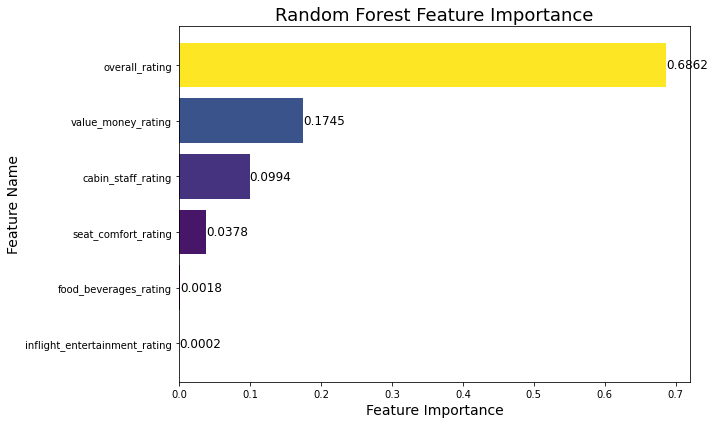

In [88]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import numpy as np

importance_df = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': model.stages[-1].featureImportances
}).sort_values(by="Importance", ascending=False)

# Normalize to the viridis colormap
norm = plt.Normalize(vmin=importance_df['Importance'].min(), vmax=importance_df['Importance'].max())
colors = cm.viridis(norm(importance_df['Importance']))

# Display the plot
plt.figure(figsize=(10, 6))
bars = plt.barh(importance_df['Feature'], importance_df['Importance'], color=colors)
plt.title('Random Forest Feature Importance', fontsize=18)
plt.xlabel('Feature Importance', fontsize=14)
plt.ylabel('Feature Name', fontsize=14)

# Add importance values to the bars
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, 
             f'{bar.get_width():.4f}', va='center', fontsize=12)

# Invert y-axis to show the most important features at the top
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

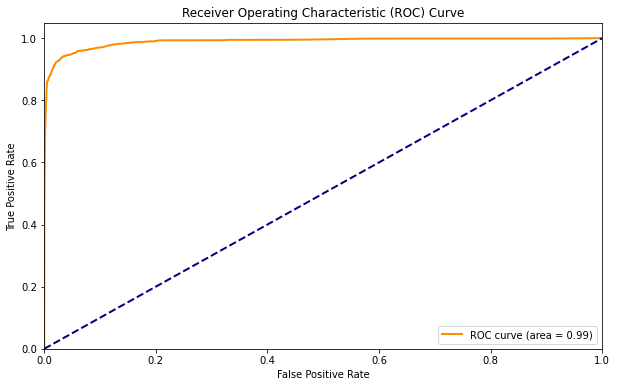

In [89]:
# Extract the predicted probabilities for the positive class
probabilities = predictions.select("probability").rdd.map(lambda row: row[0][1]).collect()

# Extract the true labels
labels = predictions.select("recommended").rdd.map(lambda row: row[0]).collect()

# Compute the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(labels, probabilities)
roc_auc = auc(fpr, tpr)

# Display the plot
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


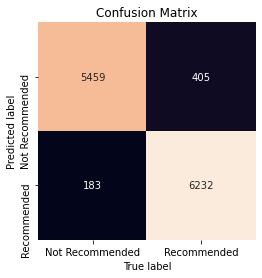

In [90]:
# Collect the actual labels
y_true = predictions.select("recommended").rdd.map(lambda row: row[0]).collect()

# Collect the predicted labels
y_pred = predictions.select("prediction").rdd.map(lambda row: row[0]).collect()

# Compute the confusion matrix
mat = confusion_matrix(y_true, y_pred)

# Create a heatmap for the confusion matrix
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=["Not Recommended", "Recommended"],
            yticklabels=["Not Recommended", "Recommended"])

# Display
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title('Confusion Matrix')
plt.show() 

# RandomForestRegression process

In [91]:
# Remove columns with many missing values and unnecessary columns 
lounge_df_cleaned = lounge_df.drop("link", "title", "author", "author_country", "date", "content", "date_visit", "type_traveller", "lounge_type", "airport", "lounge_name")

airline_df_cleaned = airline_df.drop("link", "title", "author", "author_country", "date", "content", "wifi_connectivity_rating", "aircraft", "ground_service_rating", "route", "type_traveller", "cabin_flown")

airport_df_cleaned = airport_df.drop("link", "title", "author", "author_country", "date", "content", "airport_staff_rating", "terminal_signs_rating", "wifi_connectivity_rating", "terminal_seating_rating", "food_beverages_rating", "date_visit", "experience_airport", "type_traveller")

seat_df_cleaned = seat_df.drop("link", "title", "author", "author_country", "content", "date_flown", "type_traveller", "power_supply_rating", "seat_storage_rating", "aircraft", "seat_layout")
# Drop rows with null values in the 'recommended' column
airline_df_cleaned = airline_df_cleaned.dropna(subset=["recommended"])

airport_df_cleaned = airport_df_cleaned.dropna(subset=["recommended"])

seat_df_cleaned = seat_df_cleaned.dropna(subset=["recommended"])

lounge_df_cleaned = lounge_df_cleaned.dropna(subset=["recommended"])

In [92]:
seat_df_cleaned_Regression = seat_df_cleaned.withColumnRenamed("overall_rating", "seat_overall_rating")
airline_df_cleaned_Regression = airline_df_cleaned.withColumnRenamed("overall_rating", "airline_overall_rating")

In [93]:
merged_df_Regression = seat_df_cleaned_Regression.join(airline_df_cleaned_Regression, on="airline_name", how="inner")

In [94]:
merged_df_Regression = merged_df_Regression.withColumn(
    "combined_overall_rating",
    (col("seat_overall_rating") + col("airline_overall_rating")) / 2
)

In [95]:
"""
The code snippet (PySpark Missing Data Imputation – How to handle missing values in PySpark) below has been adapted from
https://www.machinelearningplus.com/pyspark/pyspark-missing-data-imputation/
"""
from pyspark.sql.types import FloatType
from pyspark.ml.feature import Imputer

def get_numeric_columns(df):
    return [column.name for column in df.schema.fields if isinstance(column.dataType, (FloatType))]


def impute_missing_values(df):
    numeric_column_names = get_numeric_columns(df)

    imputer = Imputer(
        inputCols=numeric_column_names,
        outputCols=numeric_column_names,
        strategy="mean"
    )

    imputed_df = imputer.fit(df).transform(df)
    
    return imputed_df
merged_df_Regression = impute_missing_values(merged_df_Regression) 

In [96]:
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml import Pipeline

"""
The code snippet (random-forest-regression) below has been adapted from
https://spark.apache.org/docs/latest/ml-classification-regression.html#random-forest-regression
"""
feature_cols = [
    "seat_legroom_rating", "seat_recline_rating", "seat_width_rating", 
    "aisle_space_rating", "viewing_tv_rating", "seat_comfort_rating", 
    "cabin_staff_rating", "food_beverages_rating", "value_money_rating"
]


cleaned_df = merged_df_Regression.na.drop(subset=feature_cols + ["combined_overall_rating"])


assembler = VectorAssembler(inputCols=feature_cols, outputCol="features_vector")
assembled_df = assembler.transform(cleaned_df)


scaler = StandardScaler(inputCol="features_vector", outputCol="scaled_features", withStd=True, withMean=True)


rf = RandomForestRegressor(featuresCol="scaled_features", labelCol="combined_overall_rating", numTrees=100, maxDepth=5)


pipeline = Pipeline(stages=[assembler, scaler, rf])


train_data, test_data = cleaned_df.randomSplit([0.8, 0.2], seed=42)


rfModel = pipeline.fit(train_data)

In [97]:
# predictions on test
RFR_predictions = rfModel.transform(test_data)

# modal
RFR_evaluator = RegressionEvaluator(labelCol="combined_overall_rating", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE): {rmse}")

model = pipeline.fit(train_data)
rfModel = model.stages[2]
print(rfModel)

Root Mean Squared Error (RMSE): 0.9521133642804789
RandomForestRegressionModel: uid=RandomForestRegressor_aa411755e8ef, numTrees=100, numFeatures=9


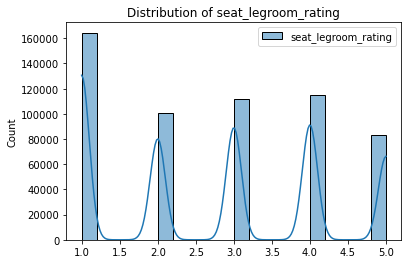

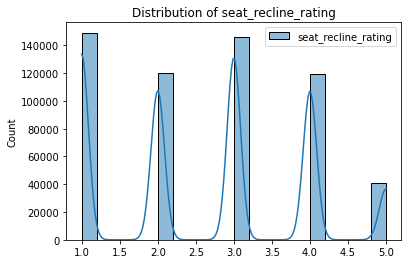

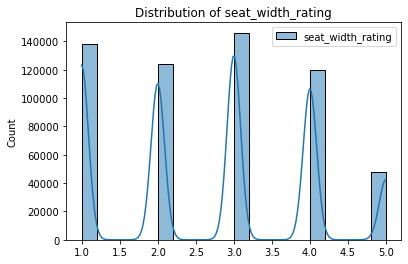

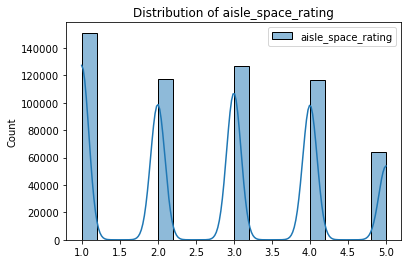

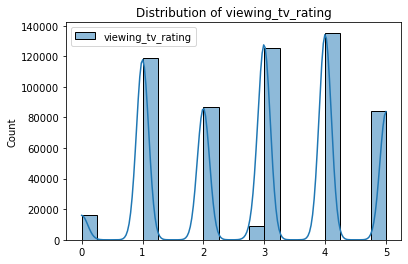

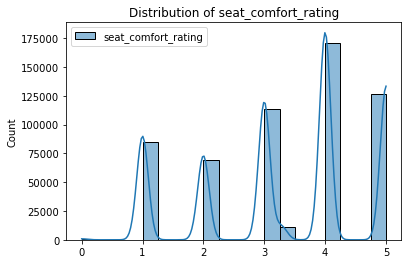

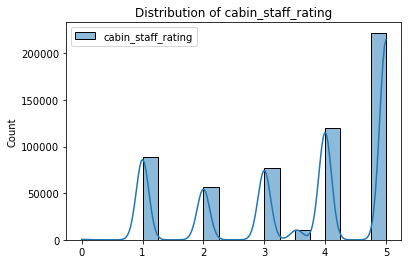

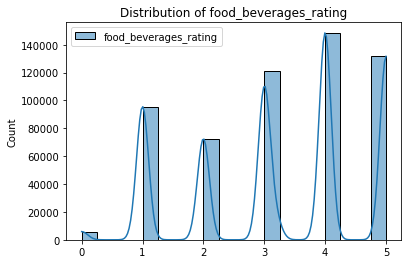

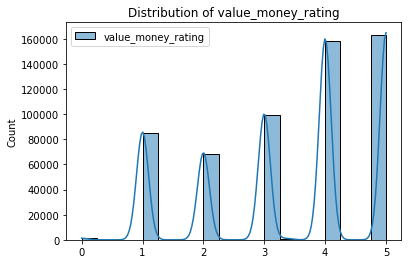

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

for feature in feature_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(cleaned_df.select(feature).toPandas(), bins=20, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

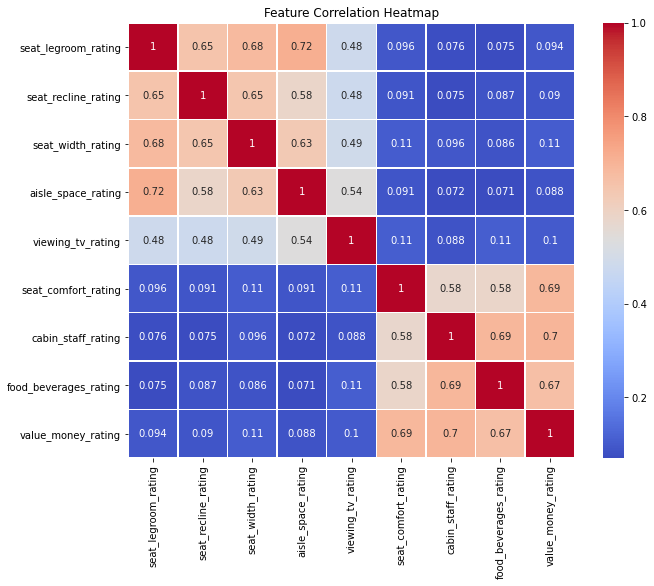

In [99]:

# matrix
correlation_matrix = cleaned_df.select(feature_cols).toPandas().corr()

# heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


# FPGrowth processing

In [100]:
# Remove columns with many missing values and unnecessary columns 
lounge_df_cleaned = lounge_df.drop("link", "title", "author", "author_country", "date", "content", "date_visit", "type_traveller", "lounge_type", "airport", "lounge_name")

airline_df_cleaned = airline_df.drop("link", "title", "author", "author_country", "date", "content", "wifi_connectivity_rating", "aircraft", "ground_service_rating", "route", "type_traveller", "cabin_flown")

airport_df_cleaned = airport_df.drop("link", "title", "author", "author_country", "date", "content", "airport_staff_rating", "terminal_signs_rating", "wifi_connectivity_rating", "terminal_seating_rating", "food_beverages_rating", "date_visit", "experience_airport", "type_traveller")

seat_df_cleaned = seat_df.drop("link", "title", "author", "author_country", "content", "date_flown", "type_traveller", "power_supply_rating", "seat_storage_rating", "aircraft", "seat_layout")
# Drop rows with null values in the 'recommended' column
airline_df_cleaned = airline_df_cleaned.dropna(subset=["recommended"])

airport_df_cleaned = airport_df_cleaned.dropna(subset=["recommended"])

seat_df_cleaned = seat_df_cleaned.dropna(subset=["recommended"])

lounge_df_cleaned = lounge_df_cleaned.dropna(subset=["recommended"])

In [101]:
import pyspark.sql.functions as F
all_columns = set(lounge_df_cleaned.columns) | set(airline_df_cleaned.columns) | set(airport_df_cleaned.columns) | set(seat_df_cleaned.columns)

# Align each DataFrame to have the same set of columns
lounge_df_aligned = lounge_df_cleaned.select([F.col(c) if c in lounge_df_cleaned.columns else F.lit(None).alias(c) for c in all_columns])
airline_df_aligned = airline_df_cleaned.select([F.col(c) if c in airline_df_cleaned.columns else F.lit(None).alias(c) for c in all_columns])
airport_df_aligned = airport_df_cleaned.select([F.col(c) if c in airport_df_cleaned.columns else F.lit(None).alias(c) for c in all_columns])
seat_df_aligned = seat_df_cleaned.select([F.col(c) if c in seat_df_cleaned.columns else F.lit(None).alias(c) for c in all_columns])

# Combine DataFrames
combined_df_FPGrowth = lounge_df_aligned.union(airline_df_aligned).union(airport_df_aligned).union(seat_df_aligned)

"""
The code snippet (PySpark Missing Data Imputation – How to handle missing values in PySpark) below has been adapted from
https://www.machinelearningplus.com/pyspark/pyspark-missing-data-imputation/
"""
from pyspark.sql.types import FloatType
from pyspark.ml.feature import Imputer

def get_numeric_columns(df):
    return [column.name for column in df.schema.fields if isinstance(column.dataType, (FloatType))]


def impute_missing_values(df):
    numeric_column_names = get_numeric_columns(df)

    imputer = Imputer(
        inputCols=numeric_column_names,
        outputCols=numeric_column_names,
        strategy="median"
    )

    imputed_df = imputer.fit(df).transform(df)
    
    return imputed_df

# Apply imputation to the combined DataFrame
combined_df_FPGrowth = impute_missing_values(combined_df_FPGrowth)

In [102]:
# mean and stddev
overall_mean = combined_df_FPGrowth.agg(F.mean("overall_rating")).collect()[0][0]
overall_stddev = combined_df_FPGrowth.agg(F.stddev("overall_rating")).collect()[0][0]

seat_legroom_mean = combined_df_FPGrowth.agg(F.mean("seat_legroom_rating")).collect()[0][0]
seat_legroom_stddev = combined_df_FPGrowth.agg(F.stddev("seat_legroom_rating")).collect()[0][0]

seat_comfort_mean = combined_df_FPGrowth.agg(F.mean("seat_comfort_rating")).collect()[0][0]
seat_comfort_stddev = combined_df_FPGrowth.agg(F.stddev("seat_comfort_rating")).collect()[0][0]

value_money_mean = combined_df_FPGrowth.agg(F.mean("value_money_rating")).collect()[0][0]
value_money_stddev = combined_df_FPGrowth.agg(F.stddev("value_money_rating")).collect()[0][0]

print("Overall Rating: mean =", overall_mean, ", stddev =", overall_stddev)
print("Seat Legroom Rating: mean =", seat_legroom_mean, ", stddev =", seat_legroom_stddev)
print("Seat Comfort Rating: mean =", seat_comfort_mean, ", stddev =", seat_comfort_stddev)
print("Value for Money Rating: mean =", value_money_mean, ", stddev =", value_money_stddev)



Overall Rating: mean = 5.389741531545995 , stddev = 2.944392632407913
Seat Legroom Rating: mean = 2.995167763685985 , stddev = 0.2070203240784318
Seat Comfort Rating: mean = 3.0539733504575373 , stddev = 1.0305464887764244
Value for Money Rating: mean = 3.473478889067266 , stddev = 1.276309674220928


In [103]:


# Adding categorized columns to combined_df with refined categories
combined_df_FPGrowth= combined_df_FPGrowth.withColumn(
    "overall_rating_category", 
    F.when(F.col("overall_rating") >= 9, "outstanding_rating")
     .when(F.col("overall_rating") >= 8, "very_high_rating")
     .when(F.col("overall_rating") >= 6, "high_rating")
     .when(F.col("overall_rating") >= 4, "moderate_rating")
     .otherwise("low_rating")
).withColumn(
    "seat_legroom_rating_category", 
    F.when(F.col("seat_legroom_rating") >= 4, "superb_legroom")
     .when(F.col("seat_legroom_rating") >= 3, "excellent_legroom")
     .when(F.col("seat_legroom_rating") >= 2.5, "good_legroom")
     .when(F.col("seat_legroom_rating") >= 2, "fair_legroom")
     .otherwise("poor_legroom")
).withColumn(
    "recommended_category", 
    F.when(F.col("recommended") == 1, "recommended")
     .otherwise("not_recommended")
).withColumn(
    "seat_comfort_category",
    F.when(F.col("seat_comfort_rating") >= 5, "extremely_comfortable_seat")
     .when(F.col("seat_comfort_rating") >= 4, "very_comfortable_seat")
     .when(F.col("seat_comfort_rating") >= 3, "comfortable_seat")
     .otherwise("uncomfortable_seat")
).withColumn(
    "value_for_money_category",
    F.when(F.col("value_money_rating") >= 7, "outstanding_value")
     .when(F.col("value_money_rating") >= 5, "excellent_value")
     .when(F.col("value_money_rating") >= 3, "good_value")
     .when(F.col("value_money_rating") >= 2, "adequate_value")
     .otherwise("poor_value")
)


In [104]:
combined_df_FPGrowth.groupBy("overall_rating_category").count().show()
combined_df_FPGrowth.groupBy("seat_legroom_rating_category").count().show()
combined_df_FPGrowth.groupBy("recommended_category").count().show()
combined_df_FPGrowth.groupBy("seat_comfort_category").count().show()
combined_df_FPGrowth.groupBy("value_for_money_category").count().show()

+-----------------------+-----+
|overall_rating_category|count|
+-----------------------+-----+
|        moderate_rating|17721|
|     outstanding_rating|12996|
|            high_rating| 6407|
|       very_high_rating| 6379|
|             low_rating|18787|
+-----------------------+-----+

+----------------------------+-----+
|seat_legroom_rating_category|count|
+----------------------------+-----+
|                poor_legroom|  363|
|                fair_legroom|  208|
|           excellent_legroom|61275|
|              superb_legroom|  444|
+----------------------------+-----+

+--------------------+-----+
|recommended_category|count|
+--------------------+-----+
|     not_recommended|35102|
|         recommended|27188|
+--------------------+-----+

+---------------------+-----+
|seat_comfort_category|count|
+---------------------+-----+
|   uncomfortable_seat|10584|
|     comfortable_seat|36183|
| very_comfortable_...| 9839|
| extremely_comfort...| 5684|
+---------------------+-----+

In [106]:
from pyspark.ml.fpm import FPGrowth
"""
The code snippet (Frequent Pattern Mining) below has been adapted from
https://spark.apache.org/docs/3.5.2/ml-frequent-pattern-mining.html
"""
# Create an array column with the refined categories
combined_df_FPGrowth = combined_df_FPGrowth.withColumn(
    "items",
    F.array(
        "overall_rating_category",
        "seat_legroom_rating_category",
        "recommended_category",
        "seat_comfort_category",
        "value_for_money_category",
    )
)

# Remove duplicate items from the array
combined_df_FPGrowth = combined_df_FPGrowth.withColumn("items", F.array_distinct("items"))

# Display the "items" column
combined_df_FPGrowth.select("items").show(truncate=False)

# Use FPGrowth for frequent itemset mining
fpGrowth = FPGrowth(itemsCol="items", minSupport=0.03, minConfidence=0.8)
model = fpGrowth.fit(combined_df_FPGrowth)

# Display frequent itemsets
model.freqItemsets.show()

# Display association rules
model.associationRules.show()

association_rules = model.associationRules

filtered_rules = association_rules.filter(F.col("lift") > 1)
filtered_rules.show()

+-----------------------------------------------------------------------------------+
|items                                                                              |
+-----------------------------------------------------------------------------------+
|[low_rating, excellent_legroom, recommended, comfortable_seat, good_value]         |
|[moderate_rating, excellent_legroom, recommended, comfortable_seat, good_value]    |
|[moderate_rating, excellent_legroom, recommended, comfortable_seat, good_value]    |
|[low_rating, excellent_legroom, not_recommended, comfortable_seat, good_value]     |
|[moderate_rating, excellent_legroom, recommended, comfortable_seat, good_value]    |
|[moderate_rating, excellent_legroom, not_recommended, comfortable_seat, good_value]|
|[moderate_rating, excellent_legroom, not_recommended, comfortable_seat, good_value]|
|[low_rating, excellent_legroom, not_recommended, comfortable_seat, good_value]     |
|[low_rating, excellent_legroom, not_recommended, comf

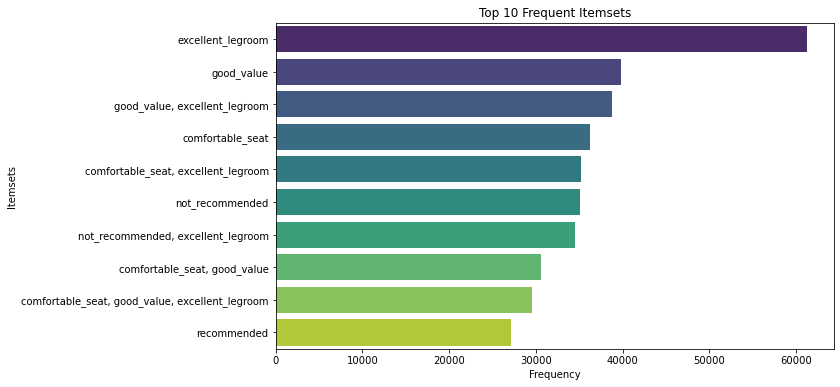

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert frequent itemsets to pandas DataFrame for easier manipulation
freq_itemsets_df = model.freqItemsets.toPandas()

# Convert the 'items' column (list) to a string representation
freq_itemsets_df['items'] = freq_itemsets_df['items'].apply(lambda x: ', '.join(x))

# Sort the itemsets by frequency in descending order
freq_itemsets_df = freq_itemsets_df.sort_values(by="freq", ascending=False)

# Visualize the top 10 frequent itemsets
plt.figure(figsize=(10, 6))
sns.barplot(x="freq", y="items", data=freq_itemsets_df.head(10), palette="viridis")
plt.title("Top 10 Frequent Itemsets")
plt.xlabel("Frequency")
plt.ylabel("Itemsets")
plt.show()

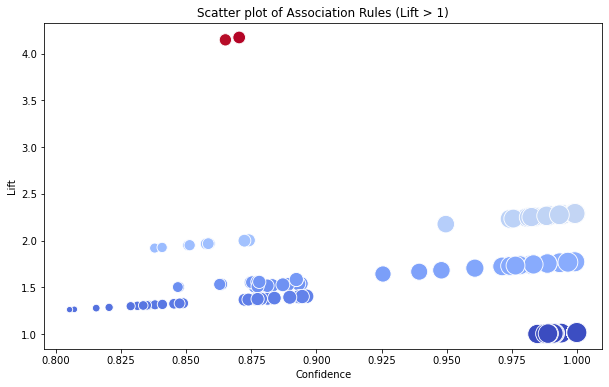

In [108]:
# Convert association rules to pandas DataFrame
association_rules_df = model.associationRules.toPandas()

# Filter rules with lift > 1 for visualization
filtered_rules_df = association_rules_df[association_rules_df["lift"] > 1]

# Create a scatter plot of confidence vs. lift
plt.figure(figsize=(10, 6))
sns.scatterplot(x="confidence", y="lift", size="confidence", hue="lift", data=filtered_rules_df, palette="coolwarm", sizes=(40, 400), legend=False)
plt.title("Scatter plot of Association Rules (Lift > 1)")
plt.xlabel("Confidence")
plt.ylabel("Lift")
plt.show()


# KMeans processing

In [109]:
# Remove columns with many missing values and unnecessary columns 
lounge_df_cleaned = lounge_df.drop("link", "title", "author", "author_country", "date", "content", "date_visit", "type_traveller", "lounge_type", "airport", "lounge_name")

airline_df_cleaned = airline_df.drop("link", "title", "author", "author_country", "date", "content", "wifi_connectivity_rating", "aircraft", "ground_service_rating", "route", "type_traveller", "cabin_flown")

airport_df_cleaned = airport_df.drop("link", "title", "author", "author_country", "date", "content", "airport_staff_rating", "terminal_signs_rating", "wifi_connectivity_rating", "terminal_seating_rating", "food_beverages_rating", "date_visit", "experience_airport", "type_traveller")

seat_df_cleaned = seat_df.drop("link", "title", "author", "author_country", "content", "date_flown", "type_traveller", "power_supply_rating", "seat_storage_rating", "aircraft", "seat_layout")
# Drop rows with null values in the 'recommended' column
airline_df_cleaned = airline_df_cleaned.dropna(subset=["recommended"])

airport_df_cleaned = airport_df_cleaned.dropna(subset=["recommended"])

seat_df_cleaned = seat_df_cleaned.dropna(subset=["recommended"])

lounge_df_cleaned = lounge_df_cleaned.dropna(subset=["recommended"])

In [110]:
from pyspark.sql import functions as F

all_columns = set(lounge_df_cleaned.columns) | set(airline_df_cleaned.columns) | set(airport_df_cleaned.columns) | set(seat_df_cleaned.columns)

lounge_df_aligned = lounge_df_cleaned.select([F.col(c) if c in lounge_df_cleaned.columns else F.lit(None).alias(c) for c in all_columns])
airline_df_aligned = airline_df_cleaned.select([F.col(c) if c in airline_df_cleaned.columns else F.lit(None).alias(c) for c in all_columns])
airport_df_aligned = airport_df_cleaned.select([F.col(c) if c in airport_df_cleaned.columns else F.lit(None).alias(c) for c in all_columns])
seat_df_aligned = seat_df_cleaned.select([F.col(c) if c in seat_df_cleaned.columns else F.lit(None).alias(c) for c in all_columns])

combined_df_kmeans = lounge_df_aligned.union(airline_df_aligned).union(airport_df_aligned).union(seat_df_aligned)

In [127]:
"""
The code snippet (PySpark Missing Data Imputation – How to handle missing values in PySpark) below has been adapted from
https://www.machinelearningplus.com/pyspark/pyspark-missing-data-imputation/
"""
from pyspark.sql.types import FloatType
from pyspark.ml.feature import Imputer

def get_numeric_columns(df):
    return [column.name for column in df.schema.fields if isinstance(column.dataType, (FloatType))]


def impute_missing_values(df):
    numeric_column_names = get_numeric_columns(df)

    imputer = Imputer(
        inputCols=numeric_column_names,
        outputCols=numeric_column_names,
        strategy="median"
    )

    imputed_df = imputer.fit(df).transform(df)
    
    return imputed_df


combined_df_kmeans = impute_missing_values(combined_df_kmeans)

In [128]:
calculate_missing_percentage(combined_df_kmeans, "combined_df_kmeans")

Table: combined_df_kmeans
+------------------+---------------+
|         Variables|Percent_Missing|
+------------------+---------------+
|       cabin_flown|          98.01|
|              date|           98.0|
|cleanliness_rating|          96.38|
|    comfort_rating|          96.38|
|      airport_name|          71.67|
|      airline_name|          28.33|
+------------------+---------------+



In [129]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml.feature import VectorAssembler, StandardScaler

"""
The code snippet (Clustering) below has been adapted from
https://spark.apache.org/docs/3.5.2/ml-clustering.html#k-means
"""
# Loads data.
feature_cols = ['overall_rating', 'seat_comfort_rating', 'cabin_staff_rating', 
                'food_beverages_rating', 'inflight_entertainment_rating', 
                'value_money_rating']

# Create a VectorAssembler to generate a new column called "features"
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")

assembler_data = assembler.transform(combined_df_kmeans)

"""
The code snippet (standard_scaler_example)below has been adapted from
https://github.com/apache/spark/blob/master/examples/src/main/python/ml/standard_scaler_example.py

"""
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")
scaler_model = scaler.fit(assembler_data)
scaled_df = scaler_model.transform(assembler_data)

In [130]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler, StandardScaler
"""
The code snippet (Elbow Method for optimal value of k in KMeans)below has been adapted from
https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/
"""
costs = []
for k in range(2, 11):  
    kmeans = KMeans(featuresCol="scaled_features", k=k)
    
    model = kmeans.fit(scaled_df)
    
    wssse = model.summary.trainingCost
    
    costs.append((k, wssse))

for k, cost in costs:
    print(f"K = {k}, WSSSE = {cost}")

K = 2, WSSSE = 233469.1097840472
K = 3, WSSSE = 211424.42037641685
K = 4, WSSSE = 142564.40223310777
K = 5, WSSSE = 126634.44386060418
K = 6, WSSSE = 124731.95628167863
K = 7, WSSSE = 116470.69208480402
K = 8, WSSSE = 102763.11266310747
K = 9, WSSSE = 104482.01142430588
K = 10, WSSSE = 90448.63031129252


In [131]:
# Create a VectorAssembler to combine the feature columns into a single features column
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
assembler_data = assembler.transform(combined_df_kmeans)

# Scale the features to ensure that the features are on the same scale
scaler = StandardScaler(inputCol="features", outputCol="scaled_features")

# Fit the scaler on the data and apply the scaling transformation
scaler_model = scaler.fit(assembler_data)
scaled_df = scaler_model.transform(assembler_data)


In [140]:
# Split the data into training and testing sets
train_data, test_data = scaled_df.randomSplit([0.7, 0.3], seed=123)

# Trains a k-means model
kmeans = KMeans(featuresCol="scaled_features", predictionCol="prediction").setK(8).setSeed(1)
model = kmeans.fit(train_data)

# Make predictions using test data
predictions = model.transform(test_data)

predictions.select("airline_name", "scaled_features", "prediction")
    

DataFrame[airline_name: string, scaled_features: vector, prediction: int]

In [141]:
# Evaluate clustering by computing Silhouette score
evaluator = ClusteringEvaluator(featuresCol="features", metricName="silhouette", distanceMeasure="squaredEuclidean")

silhouette = evaluator.evaluate(predictions)
print("Silhouette with squared euclidean distance = " + str(silhouette))

# Shows the result.
centers = model.clusterCenters()
print("Cluster Centers: ")
for center in centers:
    print(center)

Silhouette with squared euclidean distance = 0.4205597424238585
Cluster Centers: 
[1.19254308 2.89856747 3.38092025 2.59050688 1.62729063 3.1095527 ]
[2.9649956  4.08189914 3.89231698 3.54915227 0.67075528 3.49562935]
[0.83452243 1.08376645 1.21684759 0.99288451 0.93835333 0.99952466]
[2.40547513 3.49410368 3.19410227 2.91995673 3.16110546 3.05893571]
[2.7763335  2.99676918 3.42317042 2.35184472 1.49873424 3.17308023]
[1.18703085 2.3092635  3.12781581 2.53289316 1.66106275 1.12029871]
[1.14828658 2.97619048 1.47622661 1.37730573 1.43546259 1.7543738 ]
[3.13110384 4.35573844 4.09535783 3.89124429 3.52199919 3.6668337 ]


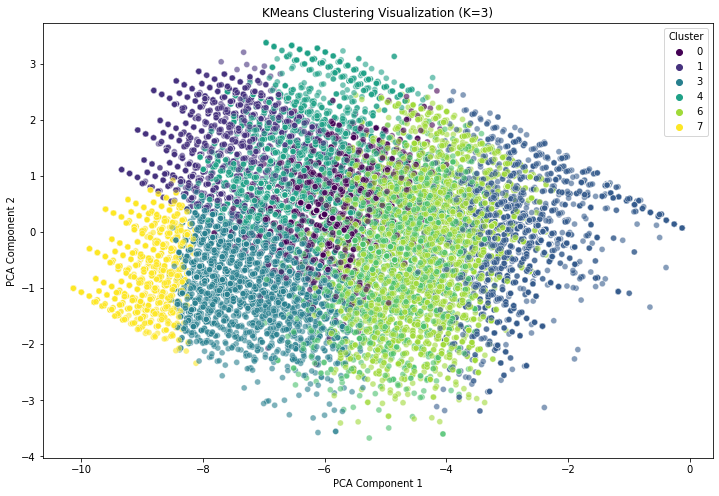

In [142]:
from pyspark.ml.feature import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Perform 2 dimensions
pca = PCA(k=2, inputCol="scaled_features", outputCol="pca_features")
pca_model = pca.fit(scaled_df)
pca_result = pca_model.transform(scaled_df)

# Make predictions 
pca_predictions = model.transform(pca_result)

# Extract columns for visualization
visual_df = pca_predictions.select("pca_features", "prediction", "airline_name", *feature_cols)

# Convert to Pandas DataFrame for visualization purposes
pandas_df = visual_df.toPandas()
# Extract the PCA components for visualization
pandas_df['pca_x'] = pandas_df['pca_features'].apply(lambda x: x[0])
pandas_df['pca_y'] = pandas_df['pca_features'].apply(lambda x: x[1])
pandas_df['cluster'] = pandas_df['prediction']
feature_df = pandas_df.copy()

# Plot the clusters using Seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pandas_df, x='pca_x', y='pca_y', hue='cluster', palette='viridis', alpha=0.6)
plt.title('KMeans Clustering Visualization (K=3)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()



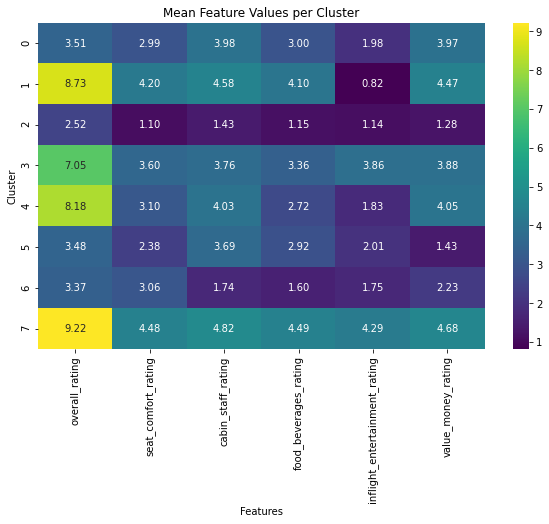

In [143]:
# Calculate mean feature values per cluster
mean_features_per_cluster = feature_df.groupby('cluster').mean().reset_index()

# Plotting a heatmap of mean feature values for each cluster
plt.figure(figsize=(10, 6))
sns.heatmap(mean_features_per_cluster[feature_cols], annot=True, cmap='viridis', fmt=".2f")
plt.title('Mean Feature Values per Cluster')
plt.xlabel('Features')
plt.ylabel('Cluster')
plt.show()

Reference code

Apache Spark. (n.d.). MLlib - Principal component analysis (PCA). Apache Spark. https://spark.apache.org/docs/latest/ml-features.html#pca

Apache Spark. (n.d.). MLlib - Random forest regression. Apache Spark. https://spark.apache.org/docs/latest/ml-classification-regression.html#random-forest-regression

Azra Zainol. (n.d.). Random Forest and Decision Tree models for predicting Iris Plant Class. GitHub. https://github.com/azrazainol/SparkMLlib_RandForest_DecTree

Data Tech Notes. (2021, December). MLlib random forest classification. Data Tech Notes. https://www.datatechnotes.com/2021/12/mllib-random-forest-classification.html

GeeksforGeeks. (n.d.). Elbow Method for optimal value of k in KMeans. GeeksforGeeks. https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

Machine Learning Plus. (2021, August 15). PySpark missing data imputation – How to handle missing values in PySpark. Machine Learning Plus. https://www.machinelearningplus.com/pyspark/pyspark-missing-data-imputation/

Matplotlib. (n.d.). Matplotlibdocumentation. Matplotlib. https://matplotlib.org/stable/contents.html

Pandas Documentation. (n.d.). Pandas documentation. Pandas. https://pandas.pydata.org/pandas-docs/stable/

Seaborn Documentation. (n.d.). Seaborn documentation. Seaborn. https://seaborn.pydata.org/